In [26]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from kymatio.numpy import Scattering1D

# Charger l'audio et rééchantillonner à 16 kHz
audio_path = "data/posh-dinner-party.wav"
y, sr = librosa.load(audio_path, sr=16000)






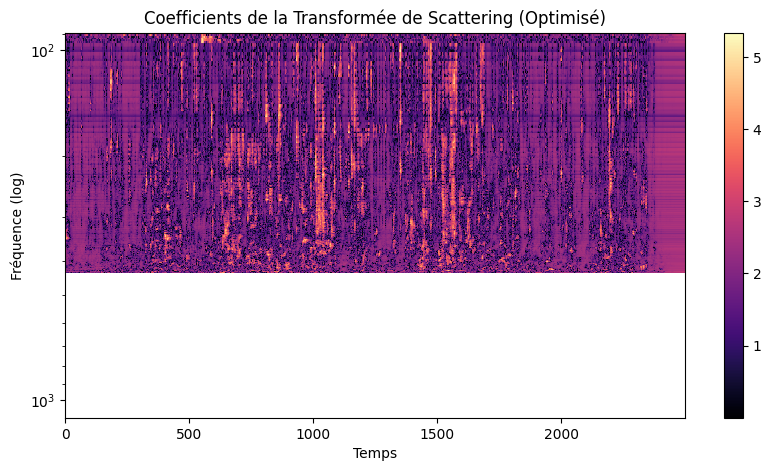

In [27]:
from sklearn.preprocessing import StandardScaler



# Normalisation du signal
y = y / np.max(np.abs(y))

# Paramètres améliorés
J = 8
Q = 16
scattering = Scattering1D(J=J, shape=(len(y),), Q=Q)

# Calcul des coefficients de Scattering
Sx = scattering(y)

# Mise à l'échelle standardisée
scaler = StandardScaler()
Sx = scaler.fit_transform(Sx.T).T

# Appliquer une transformation logarithmique améliorée
Sx = np.log1p(np.abs(Sx) * 10)

# Affichage
plt.figure(figsize=(10, 5))
plt.imshow(Sx, aspect='auto', cmap='magma', interpolation='nearest')
plt.colorbar()
plt.title("Coefficients de la Transformée de Scattering (Optimisé)")
plt.xlabel("Temps")
plt.ylabel("Fréquence (log)")
plt.yscale("log")  # Appliquer une échelle logarithmique pour la fréquence
plt.show()


'plt.subplot(2, 2, 3)\nplt.plot(S_separated[:, 2])\nplt.title("Source 3 après ICA")\n\nplt.subplot(2, 2, 4)\nplt.plot(S_separated[:, 3])\nplt.title("Source 4 après ICA")\n\nplt.tight_layout()\nplt.show() '

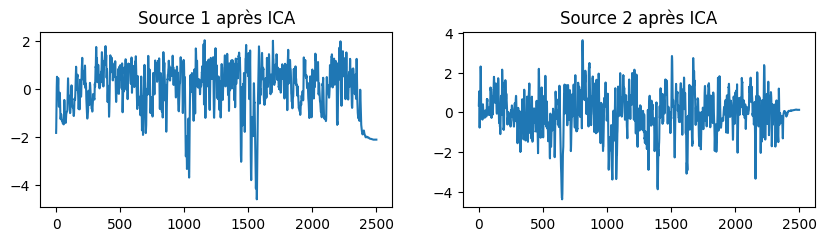

In [31]:
from sklearn.decomposition import FastICA

# Reshape pour ICA
Sx_flat = Sx.T  # Mise en forme pour ICA (temps x fréquences)

# Appliquer l'ICA pour séparer les sources
ica = FastICA(n_components=4)  # On suppose qu'il y a 4 voix
S_separated = ica.fit_transform(Sx_flat)

# Affichage des signaux séparés après ICA
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.plot(S_separated[:, 0])
plt.title("Source 1 après ICA")

plt.subplot(2, 2, 2)
plt.plot(S_separated[:, 1])
plt.title("Source 2 après ICA")

"""plt.subplot(2, 2, 3)
plt.plot(S_separated[:, 2])
plt.title("Source 3 après ICA")

plt.subplot(2, 2, 4)
plt.plot(S_separated[:, 3])
plt.title("Source 4 après ICA")

plt.tight_layout()
plt.show() """


In [33]:
import soundfile as sf

# Normalisation des signaux
S1_norm = S_separated[:, 0] / np.max(np.abs(S_separated[:, 0]))
S2_norm = S_separated[:, 1] / np.max(np.abs(S_separated[:, 1]))
#s3_norm = S_separated[:, 2] / np.max(np.abs(S_separated[:, 2]))
#s4_norm = S_separated[:, 3] / np.max(np.abs(S_separated[:, 3]))

# Sauvegarde des fichiers audio séparés
sf.write("voix_1_separee.wav", S1_norm, sr)
sf.write("voix_2_separee.wav", S2_norm, sr)
#sf.write("voix_3_separee.wav", s3_norm, sr)
#sf.write("voix_4_separee.wav", s4_norm, sr)


In [39]:

import numpy as np
import librosa
import soundfile as sf
from sklearn.decomposition import FastICA

# Charger l'audio original
audio_path = "data/posh-dinner-party.wav"
y, sr = librosa.load(audio_path, sr=22050, mono=False)  # Charger en mode stéréo si possible

# Vérifier la forme du signal
print(f"Forme du signal original : {y.shape}")  # Doit être (2, n_samples) pour l'ICA

# Si l'audio est en mono, générer un faux second canal
if len(y.shape) == 1:
    y = np.vstack([y, y[::-1]])  # Créer un faux signal mélangé en inversant le premier canal
    print("⚠️ Le signal était en mono, un second canal artificiel a été ajouté.")

# Appliquer ICA sur les 2 canaux audio
ica = FastICA(n_components=2, max_iter=500)
S_separated = ica.fit_transform(y.T)  # Appliquer ICA sur les colonnes (temps x sources)

# Vérifier la taille après ICA
print(f"Taille après ICA : {S_separated.shape}")  # Doit être (n_samples, 2)

# Reconstruction des signaux séparés
S1_audio = S_separated[:, 0]
S2_audio = S_separated[:, 1]

# Vérifier la durée après transformation
print(f"Durée après séparation : {len(S1_audio) / sr:.2f} sec")

# Sauvegarde des fichiers audio séparés
sf.write("voix_1_separee.wav", S1_audio, sr)
sf.write("voix_2_separee.wav", S2_audio, sr)

print("✅ Séparation terminée ! Les fichiers audio sont sauvegardés avec la bonne durée.")



Forme du signal original : (2, 882000)
Taille après ICA : (882000, 2)
Durée après séparation : 40.00 sec
✅ Séparation terminée ! Les fichiers audio sont sauvegardés avec la bonne durée.


In [40]:
import librosa

# Charger le fichier audio
audio_path = "data/posh-dinner-party.wav"
y, sr = librosa.load(audio_path, sr=None, mono=False)  # Ne pas forcer le mono

# Vérifier le nombre de canaux
if len(y.shape) == 1:
    print("🎧 L'audio est MONO")
else:
    print(f"🔊 L'audio est STÉRÉO avec {y.shape[0]} canaux")


🔊 L'audio est STÉRÉO avec 2 canaux
